In [1]:


import ast
import pandas as pd
from datasets import load_dataset
from adjustText import adjust_text
import matplotlib.pyplot as plt
import seaborn as sns


#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\JA\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\JA\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Tue Dec 24 13:46:28 2024).


#WHAT ARE THE MOST DEMANDED SKILLS FOR THE TOP 3 MOST POPULAR DATA ROLES?
 Methodology
 1. clean up skill column.
 2. calculate skill count based on job_title_short.
 3. calculate skill percentage.
 4. plot final findings.


In [2]:
#step 1 job roles based in the US

df_US = df[df['job_country'] == 'United States']

df_skills = df_US.explode('job_skills')

df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [3]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

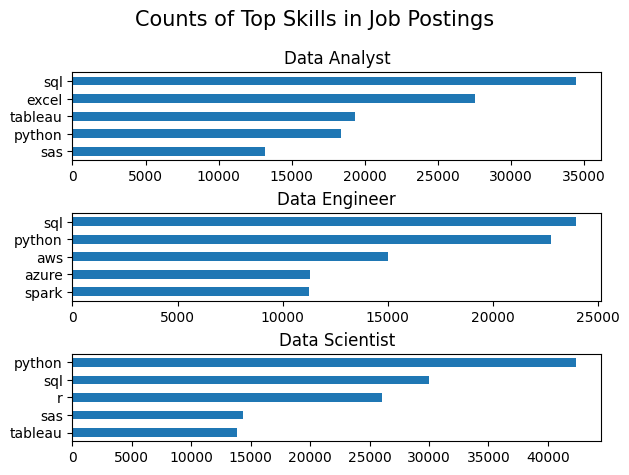

In [4]:
fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)


fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)  
fig.tight_layout(h_pad=0.5)
plt.show()  

In [5]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [6]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short' )

df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['jobs_total']



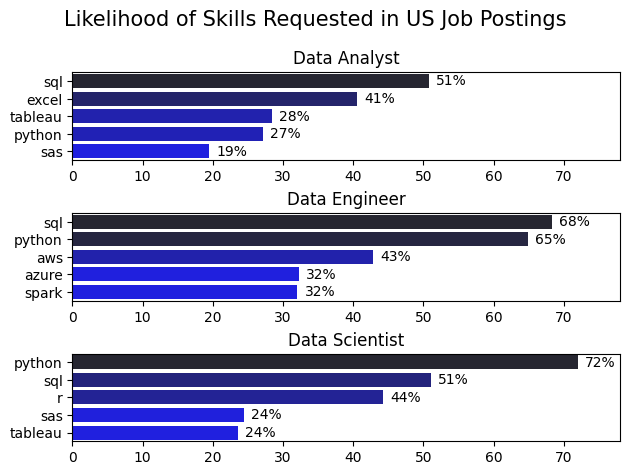

In [7]:
fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,78)
    ax[i].legend().set_visible(False)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n , f'{v:.0f}%', va='center')


fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)  
fig.tight_layout(h_pad=0.5)
plt.show()  

In [9]:


df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

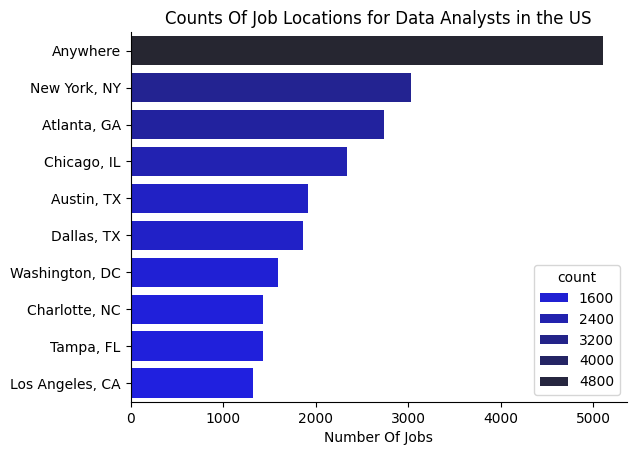

In [10]:

sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r')
sns.despine()
plt.title('Counts Of Job Locations for Data Analysts in the US')
plt.xlabel('Number Of Jobs')
plt.ylabel('')
plt.show()


In [ ]:
#only get data analyst jobs in the US

# df_DA_US = df[(df['job_title_short'] == 'Data Analyst')  & (df['job_country'] == 'United States')].copy()

# # drop NaN values from the 'salary_year_avg' column for accurate visualization

# df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])


# df_DA_US = df_DA_US.explode('job_skills')

# df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

# df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

# df_DA_skills = df_DA_US_group.sort_values(by='count' , ascending=False).head(10)
# fig, ax = plt.subplots(2, 1)
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
# ax[0].set_title('Top 10 Highest Most Paid Skills For Data Analyst')
# ax[0].set_ylabel('')
# ax[0].set_xlabel('')
# ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1])
# ax[1].set_title('Top 10 Highest Most Paid Skills For Data Analyst')
# ax[1].set_ylabel('')
# ax[1].set_xlabel('Median Salary (USD)')
# ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

# ax[1].set_xlim(ax[0].get_xlim())
# fig.tight_layout()
# fig, ax = plt.subplots(2, 1)


# #TOP PAY
# sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False)
# ax[0].set_title('Top 10 Highest Most Paid Skills For Data Analyst')
# ax[0].set_ylabel('')
# ax[0].set_xlabel('')
# ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))


# #JOB SKILLS
# sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b  ')
# ax[1].set_title('Top 10 Highest Most Paid Skills For Data Analyst')
# ax[1].set_ylabel('')
# ax[1].set_xlabel('Median Salary (USD)')
# ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

# ax[1].set_xlim(ax[0].get_xlim())
# fig.tight_layout()